# **1. QnA System using Pre-trained HuggingFace Transformer**
The QnA system relies on state-of-the-art pre-trained models provided by HuggingFace Transformers, *deepset/tinyroberta-squad2* for the Transformer out performs of the  out of all sota models. These models have been fine-tuned on large datasets to understand the context of questions and provide accurate answers. The system preprocesses the input questions and documents, tokenizes them, and feeds them into the pre-trained model. Through attention mechanisms and contextual understanding, the model identifies relevant passages within the documents and extracts answers to the questions posed by the users. By leveraging transfer learning, the QnA system can adapt to various domains and provide accurate responses even with limited training data.

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
import torch
model_name = "deepset/tinyroberta-squad2"

nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)

model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/835 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/326M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 721.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.6 MB/s eta 0:00:00


In [ ]:
import pdfplumber
with pdfplumber.open('/content/national_security_strategy.pdf') as pdf:
    text_content = ""
    for page in pdf.pages:
        text_content += page.extract_text()

In [ ]:
#paragraphs = text_content.split('\n\n')
question = "Combating transnational criminal and trafficking networks requires?"

# Tokenize question and paragraph
#for paragraph in paragraphs:
inputs = tokenizer(question, text_content, return_tensors='pt', max_length=512, truncation=True)

# Get model's output
outputs = model(**inputs)

# Extract answer span
start_scores = outputs.start_logits
end_scores = outputs.end_logits
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores) + 1
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][start_index:end_index]))

#print("Question:", question)
print("Paragraph:", start_index," ", end_index)
print("Answer:", answer)

Paragraph: tensor(0)   tensor(1)
Answer: <s>


# **2. Topic Modelling using LDA**
Latent Dirichlet Allocation (LDA) is a probabilistic generative model used for topic modeling. In the context of project, LDA is applied to analyze the contents of uploaded PDF documents and uncover latent topics within the text. The algorithm works by assuming that each document is a mixture of topics, and each word in the document is attributable to one of the document's topics. By iteratively assigning words to topics and documents to distributions of topics, LDA discovers the underlying thematic structure of the documents. This enables users to gain insights into the main themes and topics discussed in the documents, facilitating better understanding and information retrieval.

In [ ]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization
tokens = word_tokenize(text_content.lower())

# Removing punctuation and stopwords
punctuation = [',', '.', ';', ':', '!', '?', "'"]
tokens = [word for word in tokens if word not in punctuation and word not in stopwords.words('english') and not word.isdigit()]

# Stemming
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

document = ' '.join([word for word in lemmatized_tokens if len(word) > 2])

print(document)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


may 2010table content overview national security strategy strategic approach strategic environment—the world strategic approach—the world seek building foundation pursuing comprehensive engagement promoting sustainable international order strengthening national capacity—a whole government approach iii advancing interest security strengthen security resilience home disrupt dismantle defeat al-qa ida violent extremist affiliate afghanistan pakistan around world use force reverse spread nuclear biological weapon secure nuclear material advance peace security opportunity greater middle east invest capacity strong capable partner secure cyberspace prosperity strengthen education human capital enhance science technology innovation achieve balanced sustainable growth accelerate sustainable development spend taxpayer dollar wisely 34values strengthen power example promote democracy human right abroad promote dignity meeting basic need international order ensure strong alliance build cooperatio

Latent Dirichlet Allocation (LDA) is a generative probabilistic model composed of multiple components, including document-topic distributions and topic-word distributions. In LDA, each document is represented as a mixture of topics, and each topic is characterized by a distribution of words. The model infers the underlying topics by iteratively assigning words to topics based on statistical distributions.

In [ ]:
import gensim
from gensim import corpora

texts = [doc.split() for doc in [document]]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
print(lda.print_topics(num_topics=3, num_words=3))


[(0, '0.000*"security" + 0.000*"international" + 0.000*"global"'), (1, '0.001*"security" + 0.001*"international" + 0.001*"state"'), (2, '0.016*"security" + 0.011*"international" + 0.010*"state"')]


In [ ]:
document_topics = lda.get_document_topics(corpus[0], minimum_probability=0.0)

# Sort the topics by probability in descending order
sorted_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)

# Extract the top 5 topics
top_5_topics = sorted_topics[:3]

print("Top 5 Topics:")
for topic_id, prob in top_5_topics:
    print(lda.print_topic(topic_id))  # Print the top words for the topic
    print("\n")


Top 5 Topics:
0.016*"security" + 0.011*"international" + 0.010*"state" + 0.009*"’" + 0.009*"global" + 0.008*"united" + 0.007*"must" + 0.007*"world" + 0.007*"nation" + 0.007*"people"


0.001*"security" + 0.001*"international" + 0.001*"state" + 0.001*"’" + 0.001*"must" + 0.001*"nation" + 0.001*"people" + 0.001*"interest" + 0.001*"global" + 0.001*"national"


0.000*"security" + 0.000*"international" + 0.000*"global" + 0.000*"nation" + 0.000*"state" + 0.000*"people" + 0.000*"’" + 0.000*"united" + 0.000*"must" + 0.000*"cooperation"




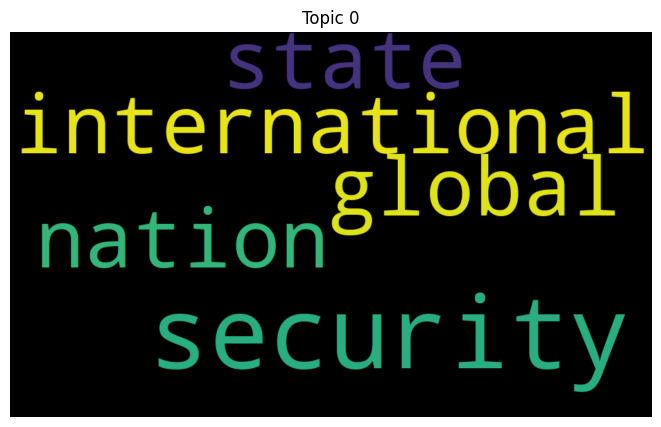

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract top words from each topic
topics = lda.show_topics(num_topics=1, num_words=5, formatted=False)
top = []
# Create a word cloud for each topic
for topic_id, topic in topics:
    word_freq = {word: freq for word, freq in topic}
    top.append({word for word, freq in topic})
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7, scale=1, background_color='black', relative_scaling=0).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()


In [ ]:
top

[{'global', 'international', 'nation', 'security', 'state'}]

# **3. Multimodal Part - OCR for Handwritten Content Detection using ResNet**
Optical Character Recognition (OCR) is a technology that enables the conversion of different types of documents, including handwritten text, into machine-readable text. The OCR component of your project utilizes ResNet, a deep convolutional neural network architecture, to perform character recognition on images containing handwritten content within PDF documents. ResNet has demonstrated remarkable performance in image recognition tasks by employing skip connections to mitigate the vanishing gradient problem. By extracting text from images, the system enhances its ability to process diverse types of content and make them accessible for further analysis and retrieval.



In [ ]:
!pip install PyMuPDF

In [ ]:
import fitz

def pdf_to_images(pdf_path, output_path):
    pdf_document = fitz.open(pdf_path)

    for page_number in range(len(pdf_document)):
        page = pdf_document.load_page(page_number)

        pixmap = page.get_pixmap()
        #call the model to directly covert the image to text_content
        # Save the pixmap as an image file (optional, for debugging purposes)
        #image_file = f"page_{page_number + 1}.png"
        #pixmap.writePNG(image_file)

    pdf_document.close()

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = mnist.load_data()
data

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
df_num = pd.read_csv("/content/mnist_train.csv")
df_alph = dataset = pd.read_csv("/content/A_Z Handwritten Data.csv")
df_alph["0"] += 10

In [5]:
df_num.shape, df_alph.shape

((1150, 785), (1678, 785))

In [6]:
df = pd.concat([df_num, df_alph], axis = 0)
df.shape

(2828, 1570)

In [7]:
SEED = 42
np.random.seed(SEED)

In [8]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pixel_array = ["Label"]
for i in range(1, 785):
    pixel_array.append(f"pixel_{i}")
df_num.columns = pixel_array
df_alph.columns = pixel_array
del pixel_array

In [10]:
df = pd.concat([df_num, df_alph], axis = 0)
df.shape

(2828, 785)

In [11]:
X = df.drop(["Label"], axis = 1)
y = df["Label"]
X.shape

(2828, 784)

In [12]:
X_reshaped = X.values.astype("float32").reshape(X.shape[0], 28, 28)
y_int = y.values.astype("int32")
print(X.shape, "***", X_reshaped.shape)

(2828, 784) *** (2828, 28, 28)


In [13]:
X_reshaped = X_reshaped.reshape(-1, 28, 28, 1)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_int, test_size = 0.3, stratify = y)

data_to_predict = X_test.reshape(-1, 28, 28)

In [15]:
type(data_to_predict)

numpy.ndarray

In [17]:
import cv2
import numpy as np
resized_images = []
for img in data_to_predict:
    # Resize the image using OpenCV
    resized_img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    resized_images.append(resized_img)

# Convert resized_images to a numpy array
resized_images = np.array(resized_images)


In [25]:
resized_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Transfer Learning using Resnet50 for OCR(PDF files both handwritten and printed versions)

In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [19]:
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
print(conv_base.summary())

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [20]:
for layer in conv_base.layers:
  layer.trainable = False

In [45]:
resnet_model = Sequential()
resnet_model.add(conv_base)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = "relu"))
resnet_model.add(Dense(1, activation = "softmax"))

In [46]:
resnet_model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [47]:
resized_images = np.reshape(resized_images, (-1, 224, 224, 3))

In [40]:
y_train[:10]

array([10, 10,  0,  4,  3,  0, 10,  8,  0, 10], dtype=int32)

In [48]:
epochs = 2
history = resnet_model.fit(resized_images, y_train[:283], epochs = epochs)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 72s 7s/step - loss: nan - accuracy: 0.0565
Epoch 2/2
9/9 [==============================] - 64s 7s/step - loss: nan - accuracy: 0.0601


In [52]:
import tensorflow
resnet_model.save("resnet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
def plot_grid(pred = False):
    fig=plt.figure(figsize=(8, 8))
    columns = 3
    rows = 3
    for i in range(1, columns*rows +1):
        index = np.random.randint(resized_images.shape[0])
        fig.add_subplot(rows, columns, i)
        plt.imshow(resized_images[index], cmap = plt.get_cmap("gray"))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f"Label: {y_test[index]}")
    plt.tight_layout()
    plt.show()

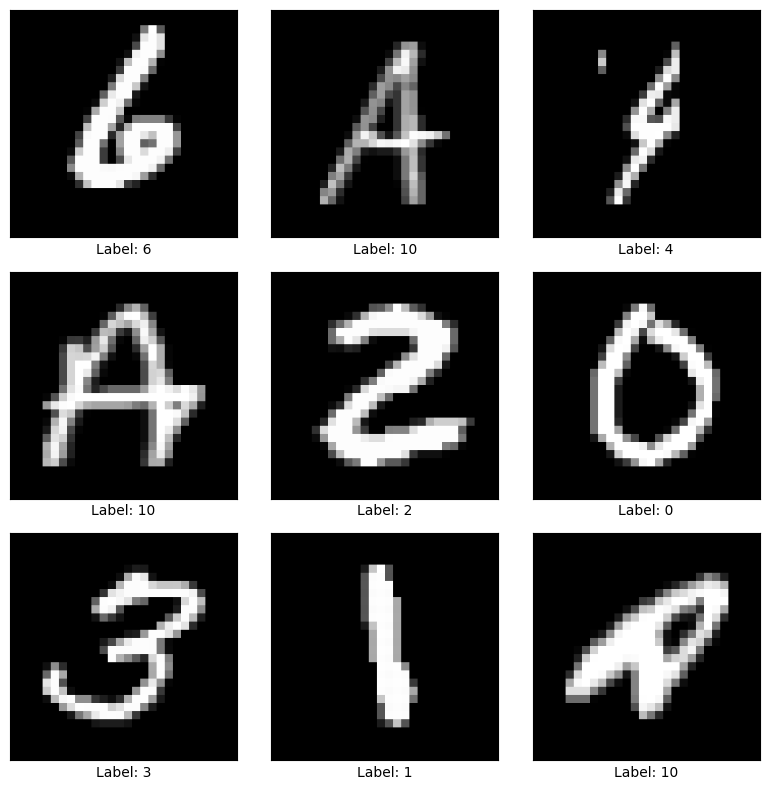

In [27]:
plot_grid()

# 4. Cross-Language System with Goslate API
The Cross-Language System integrates the Goslate API, a powerful tool for language translation and detection. The system allows users to translate content seamlessly between different languages, facilitating cross-language information retrieval and accessibility. Goslate utilizes machine translation techniques to convert text from one language to another, enabling users to overcome language barriers and access information in their preferred language. Additionally, the system employs maximum likelihood principles and algorithms such as Langid, Textblob, and Langdetect to detect the language of the input text accurately. This ensures that the translation process is optimized for accuracy and reliability.

In [ ]:
!pip install langdetect
!pip install textblob
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=697ff35e231760d91a2408e38f53dcf5cf27a369a4572e5af03548e984960924
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=1d746001743fa60829cf381620030e27a4f0500bee10756d955728cffea8940e
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
from langdetect import detect
from textblob import TextBlob
import langid
from collections import Counter
document = "你好！"

def detect_majority_language(doc):
    blob = TextBlob(doc)
    pred = [langid.classify(doc)[0], detect(doc)]
    majority_language = Counter(pred).most_common(1)[0][0]
    return majority_language

In [ ]:
detect_majority_language(document)

'zh'

In [ ]:
!pip install goslate

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for goslate: filename=goslate-1.5.4-py3-none-any.whl size=11580 sha256=b2e2c688afcc57f9f9e07e813a503d15290017fb04613d167f07e5b88c1dc81d
  Stored in directory: /root/.cache/pip/wheels/b5/30/e9/63b6de83667be2977ee793a146a2c80f8e588d5c0203b39dc9
  Created wheel for futures: filename=futures-3.0.5-py3-none-any.whl size=14068 sha256=38be309d36a94f058e2970c1e6b2d2acb204b99133ac1962dd817d5e49a4367d
  Stored in directory: /root/.cache/pip/wheels/ef/af/93/48739d464ba97d4cdc77c627d282f9794c8d276e42aaa92160
Successfully built goslate futures


In [ ]:
import goslate
primary_text = 'Love you a lot '
gs = goslate.Goslate()
gs.translate(primary_text, detect_majority_language(document))

'爱你很多'

# 5. **Next Word Prediction using LSTM**
Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) architecture designed to capture long-term dependencies in sequential data. In the project, LSTM models are trained on the text extracted from the uploaded PDF documents to predict the next word in a sequence. By learning the contextual relationships between words and capturing patterns in the text data, LSTM models can generate accurate predictions about the next word that is likely to follow in a given context. This functionality enhances user experience by providing predictive text suggestions and facilitating smoother interaction with the document content.

**Word2Vec** **embedding**


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text_content)

# Tokenize sentences into words
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Access word embeddings
#vector = model.wv['word']
similar_words = model.wv.most_similar(['yet'])#last word written by user

In [ ]:
# Sort the list of (word, similarity) tuples based on similarity score
similar_words_sorted = sorted(similar_words, key=lambda x: x[1], reverse = True)

sorted_words = [word for word, _ in similar_words_sorted]

print(sorted_words[:5])

['countries', 'who', 'is', 'for', 'we']


**LSTM model**

Long Short-Term Memory (LSTM) networks consist of memory cells and gates that regulate the flow of information through the network over time. The architecture allows LSTMs to capture long-range dependencies in sequential data and mitigate the vanishing gradient problem commonly encountered in traditional RNNs.

In [ ]:
input_seqs = []
from tensorflow.keras.preprocessing.text import Tokenizer

data = text_content.replace('\n', '').replace('\r', '').replace('"', '').replace('"', '').replace('\ufeff', '')
data = data.split()
data = ' '.join(data)
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
import pickle
pickle.dump(tokenizer, open('token.pkl', 'wb'))

token_sent = tokenizer.texts_to_sequences([data])[0]

max_len = len(token_sent)
max_len

26324

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

4658

In [ ]:
sq = []
import numpy as np
for i in range(3, max_len):
  words = token_sent[i-3:i+1]
  sq.append(words)

print("Length of sequences are:", len(sq))
sq = np.array(sq)
sq[:10]

Length of sequences are: 26321


array([[ 204,    8,  779,  662],
       [   8,  779,  662, 1814],
       [ 779,  662, 1814,  204],
       [ 662, 1814,  204,    8],
       [1814,  204,    8, 1815],
       [ 204,    8, 1815,   69],
       [   8, 1815,   69,  942],
       [1815,   69,  942, 1816],
       [  69,  942, 1816,   47],
       [ 942, 1816,   47, 1215]])

In [ ]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#padded = pad_sequences(sq, maxlen = max_len, padding = 'post')

X = []
Y = []
for i in sq:
  X.append(i[0:3])
  Y.append(i[3])

X = np.array(X)
Y = np.array(Y)

from tensorflow.keras.utils import to_categorical
y = to_categorical(Y, num_classes = vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X.shape

(26321, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense

# Define the LSTM model
model = Sequential([
    Embedding(vocab_size, 15, input_length=3),
    LSTM(150),
    Dense(vocab_size, activation='softmax')
])
#xhecpoints to save model at regular time intervals
from tensorflow.keras.callbacks import ModelCheckpoint

#saves the model at ---> next_words.h5
checkpoint = ModelCheckpoint('next_words.h5', monitor = 'loss', verbose = 1, save_best_only = True)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=3, batch_size=2, callbacks = [checkpoint])

# Evaluate the model
#loss, accuracy = model.evaluate(X_test, y_test)
#print("Test Loss:", loss)
#print("Test Accuracy:", accuracy)

# Use the model for inference
#predicted_probabilities = model.predict(sq)


Epoch 1/3
13158/13161 [============================>.] - ETA: 0s - loss: 6.9612 - accuracy: 0.0664
Epoch 1: loss improved from inf to 6.96118, saving model to next_words.h5
13161/13161 [==============================] - 222s 17ms/step - loss: 6.9612 - accuracy: 0.0664
Epoch 2/3
    7/13161 [..............................] - ETA: 3:43 - loss: 5.9238 - accuracy: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13161/13161 [==============================] - ETA: 0s - loss: 6.3211 - accuracy: 0.1144
Epoch 2: loss improved from 6.96118 to 6.32109, saving model to next_words.h5
13161/13161 [==============================] - 217s 16ms/step - loss: 6.3211 - accuracy: 0.1144
Epoch 3/3
13160/13161 [============================>.] - ETA: 0s - loss: 5.9360 - accuracy: 0.1516
Epoch 3: loss improved from 6.32109 to 5.93602, saving model to next_words.h5
13161/13161 [==============================] - 215s 16ms/step - loss: 5.9360 - accuracy: 0.1516


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 15)             69870     
                                                                 
 lstm (LSTM)                 (None, 150)               99600     
                                                                 
 dense (Dense)               (None, 4658)              703358    
                                                                 
Total params: 872828 (3.33 MB)
Trainable params: 872828 (3.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


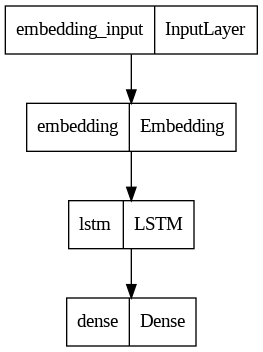

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

keras.utils.plot_model(model, to_file = 'plot.png', show_layer_names = True)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def predict(model, tokenizer, text):
  s = tokenizer.texts_to_sequences([text])
  s = np.array(s)
  preds = np.argmax(model.predict(s))
  predicted = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted += key

  return predicted

In [ ]:
while(True):
  text = input()
  if(text == ''):
    break
  else:
    text = text.split(" ")
    text = text[-3:]

    print(predict(model, tokenizer, text))